'''
验证码
'''

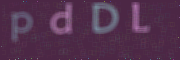

In [2]:
#方法一：Pillow

from PIL import Image,ImageDraw,ImageFont,ImageFilter
import random,string

#获取四个随机字符
def getRandomChar():
    chr_all=string.ascii_letters + string.digits
    chr_4=''.join(random.sample(chr_all,4))
    
    return chr_4


#获取随机背景颜色
def getRandromColor(low,high):
    R=random.randint(low,high)
    G=random.randint(low,high)
    B=random.randint(low,high)
    
    return R,G,B


#制作验证码图片
def getPicture():
    width,height=180,60 #图片宽、高
    image=Image.new("RGB",(width,height),getRandromColor(20,100)) #空白画布
    font=ImageFont.truetype('C:/Windows/fonts/stxinwei.ttf',40) #设置字体
    draw=ImageDraw.Draw(image) #画笔
    char_4=getRandomChar() #四个字符
    
    #将字符写到空白画布上
    for i in range(4):
        draw.text((40*i+10,0),char_4[i],font=font,fill=getRandromColor(100,200))
    
    #绘制干扰点
    for x in range(random.randint(200,600)):
        x=random.randint(1,width-1)
        y=random.randint(1,height-1)
        draw.point((x,y),fill=getRandromColor(50,150))
        
    #模糊处理
    image=image.filter(ImageFilter.BLUR)
#     image.save('./%s.jpg' % char_4)
    return image

getPicture() #显示图片

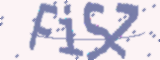

In [3]:
#方法二：captcha

from captcha.image import  ImageCaptcha
import random,string

chr_all=string.ascii_letters + string.digits
chr_4=''.join(random.sample(chr_all,4))
image=ImageCaptcha().generate_image(chr_4)
# image.save('./%s.jpg' % chr_4)

image #显示图片

In [4]:
# 方法三：gvcode

import gvcode

s,v=gvcode.generate() #s是验证码图片，v是四个字符
# s.save('./%s.jpg' % v)

s #显示图片